# Average images and subtract background

--> V0: Dev April 6, 2018, Do average (or sumup ) images and subtract background

In [1]:
%matplotlib notebook
from pySMI.smi_libs import *
from pySMI.smi_package import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

from databroker import Broker
db = Broker.named('smi')

/opt/conda_envs/pyCHX/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
%run ~/pySMI/pySMI/smi_generic_functions.py

# Setup

In [3]:
beam_x = 97.0  #Need to be corrected
beam_y = 1316.0   #1475 - 159

energy = 16.0 # 2.484 #keV
start_angle = 4.5
phi_spacing= 4.0


In [4]:
wavelength_A =12.39842/energy
sam_det = 0.275 #in meters
dq = 4*np.pi/wavelength_A  * (172/1e6/sam_det)

calibration = CalibrationGonio(wavelength_A= wavelength_A) # 20.0 keV
calibration.set_image_size(195, height=1475) # Pilatus300kW vertical
#calibration.set_image_size(1475, height=195) # Pilatus300kW horizontal
calibration.set_pixel_size(pixel_size_um=172.0)
calibration.set_beam_position(beam_x,  beam_y )
calibration.set_distance( sam_det )
calibration.set_angles(det_phi_g=0., det_theta_g=0., )
print('ratio Dw = {:.3f}'.format(calibration.get_ratioDw()))
mask_dir = '/GPFS/xf12id1/analysis/commissioning/masks/'
mask = Mask(mask_dir+'Pilatus300kWh_main_gaps-mask.png')
#mask.load('./Pilatus300kWh_current-mask.png')
mask.load(mask_dir+'Pilatus300kWh_current-mask.png')

ratio Dw = 8.199


# Define Cycle &proposal_id here

In [5]:
CYCLE='2018_1'
proposal_id =  '302728'

In [13]:
#inDir = '/GPFS/xf12id1/data/300KW/images/users/%s/'%proposal_id
inDir = '/GPFS/xf12id1/data/1M/images/users/%s/'%proposal_id

fp = get_base_all_filenames(inDir,base_filename_cut_length=-12-3 )
print('We found %s samples in %s folder.' %(len( list( fp.keys() ) ), inDir ) )

We found 59 samples in /GPFS/xf12id1/data/1M/images/users/302728/ folder.


In [14]:
for k in list(fp.keys()):
    print(k)

test_test_
POPC352_water_
POPC352_C_third_
POPC352_C_half_
POPC352_C_full_
POPC352_B_third_
POPC352_B_half_
POPC352_B_full_
POPC352_A_third_
POPC352_A_half_
POPC352_A_full_
POPC352_8.3m_water_
POPC352_8.3m_C_third_
POPC352_8.3m_C_half_
POPC352_8.3m_C_full_
POPC352_8.3m_B_third_
POPC352_8.3m_B_half_
POPC352_8.3m_B_full_
POPC352_8.3m_A_third_
POPC352_8.3m_A_half_
POPC352_8.3m_A_full_
DOPC433c_8.3m_C_third_
DOPC433c_8.3m_C_half_
DOPC433c_8.3m_C_full_
DOPC433c_8.3m_B_third_
DOPC433c_8.3m_B_half_
DOPC433c_8.3m_B_full_
DOPC433c_8.3m_A_third_
DOPC433c_8.3m_A_half_
DOPC433c_8.3m_A_full_
DOPC433b_8.3m_C_third_
DOPC433b_8.3m_C_half_
DOPC433b_8.3m_C_full_
DOPC433b_8.3m_B_third_
DOPC433b_8.3m_B_half_
DOPC433b_8.3m_B_full_
DOPC433b_8.3m_A_third_
DOPC433b_8.3m_A_half_
DOPC433b_8.3m_A_full_
DOPC433a_8.3m_C_third_
DOPC433a_8.3m_C_half_
DOPC433a_8.3m_C_full_
DOPC433a_8.3m_B_third_
DOPC433a_8.3m_B_half_
DOPC433a_8.3m_B_full_
DOPC433a_8.3m_A_third_
DOPC433a_8.3m_A_half_
DOPC433a_8.3m_A_full_
DOPC433_8.3m

## Give a background sample name here

In [47]:
bk = 'POPC352_8.3m_water_'
infiles = sorted(fp[bk])
inf1 = infiles[:]
print(len(infiles))
avgbk = average_images( inf1,  verbose= True )  #for average

4
There will be 4 files to be averaged.


<IPython.core.display.Javascript object>


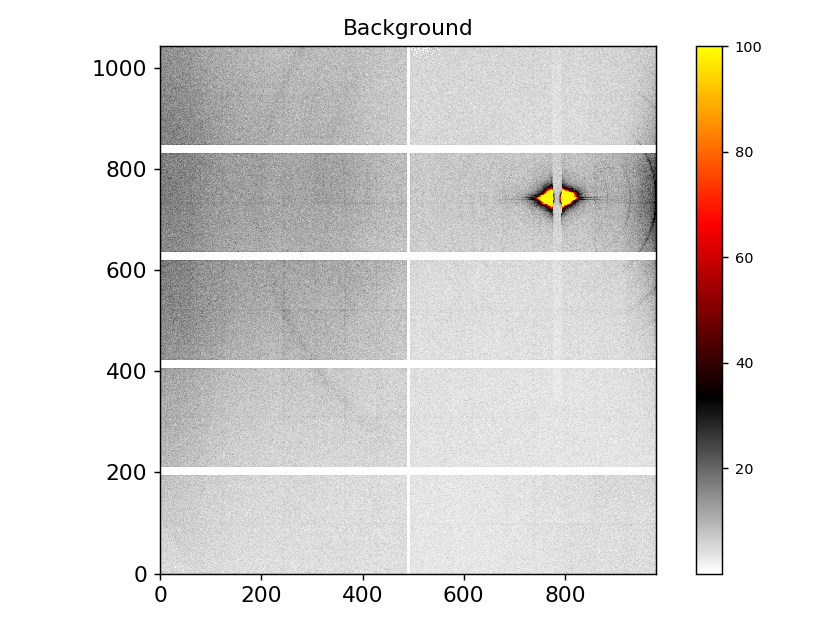

In [48]:
show_img ( avgbk, vmin=1e-4, vmax=1e2, aspect=1, show_colorbar= True, cmap=cmap_albula, image_name='Background' )

## Give a sample name here

In [49]:
k = 'DOPC433c_8.3m_A_third_'
infiles = sorted(fp[k])
print(len(infiles))

21


### Get all the corresponding files for the sample

In [50]:
inf1 = infiles[0:11]
print(inf1)

['/GPFS/xf12id1/data/1M/images/users/302728/DOPC433c_8.3m_A_third_000001_SAXS.tif', '/GPFS/xf12id1/data/1M/images/users/302728/DOPC433c_8.3m_A_third_000002_SAXS.tif', '/GPFS/xf12id1/data/1M/images/users/302728/DOPC433c_8.3m_A_third_000003_SAXS.tif', '/GPFS/xf12id1/data/1M/images/users/302728/DOPC433c_8.3m_A_third_000004_SAXS.tif', '/GPFS/xf12id1/data/1M/images/users/302728/DOPC433c_8.3m_A_third_000005_SAXS.tif', '/GPFS/xf12id1/data/1M/images/users/302728/DOPC433c_8.3m_A_third_000006_SAXS.tif', '/GPFS/xf12id1/data/1M/images/users/302728/DOPC433c_8.3m_A_third_000007_SAXS.tif', '/GPFS/xf12id1/data/1M/images/users/302728/DOPC433c_8.3m_A_third_000008_SAXS.tif', '/GPFS/xf12id1/data/1M/images/users/302728/DOPC433c_8.3m_A_third_000009_SAXS.tif', '/GPFS/xf12id1/data/1M/images/users/302728/DOPC433c_8.3m_A_third_000010_SAXS.tif', '/GPFS/xf12id1/data/1M/images/users/302728/DOPC433c_8.3m_A_third_000011_SAXS.tif']


## Do average or (sumup) for all the corresponding images

In [60]:
%run ~/pySMI/pySMI/smi_generic_functions.py

In [52]:
avg = average_images( inf1,  verbose= True )  #for average
#avg = sum_images( inf1,  verbose= True )    #for sumup

There will be 11 files to be averaged.


<IPython.core.display.Javascript object>


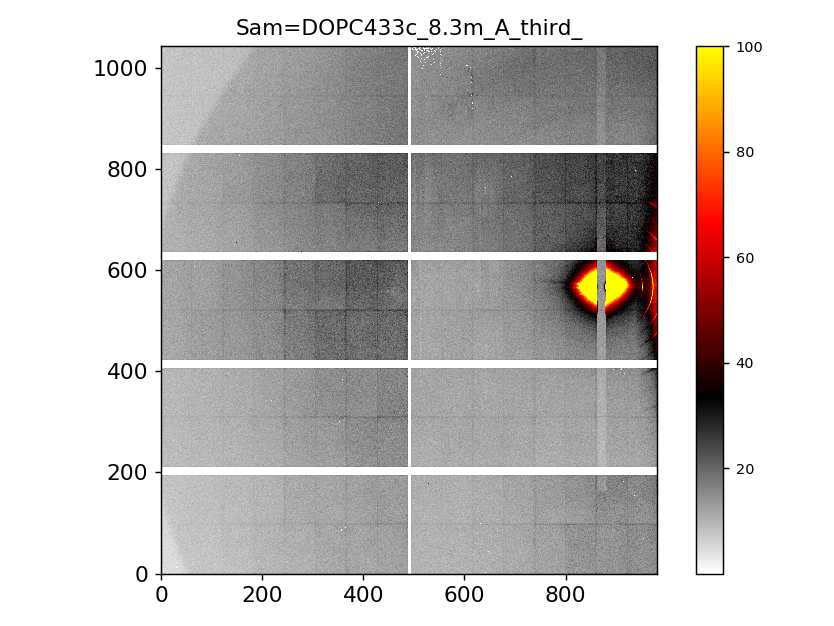

In [53]:
show_img ( avg, vmin=1e-4, vmax=1e2, aspect=1, show_colorbar= True, cmap=cmap_albula, image_name='Sam=%s'%k  )

## Get data with substract background

In [56]:
d = avg - avgbk * .1

<IPython.core.display.Javascript object>


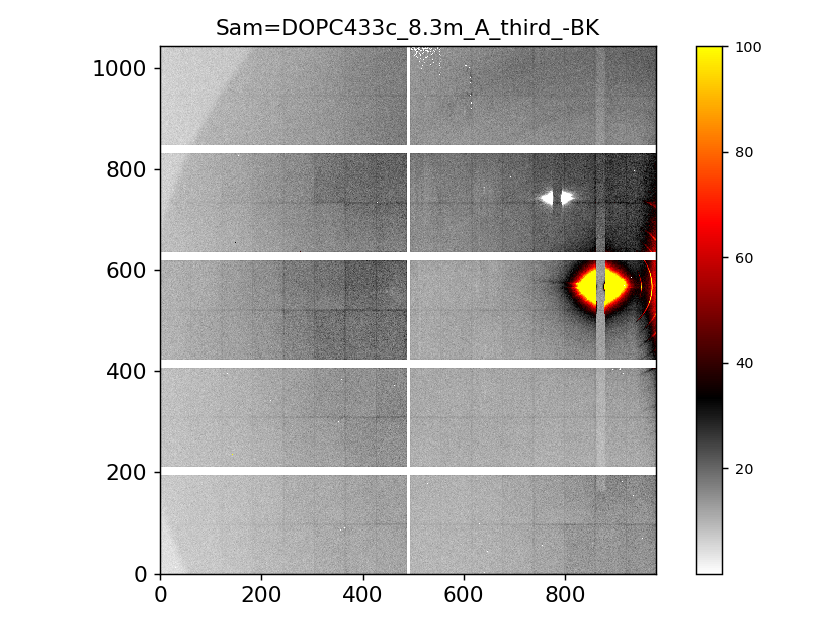

In [57]:
show_img ( d, vmin=1e-4, vmax=1e2, aspect=1, show_colorbar= True, cmap=cmap_albula, image_name='Sam=%s-BK'%k  )